In [ ]:
#importing libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D


In [ ]:
#loading the dataset
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
#checking the shape of the image
X_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

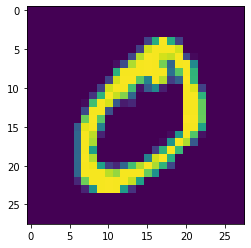

In [ ]:
#Visualizing the image
plt.imshow(X_train[1])
plt.show()

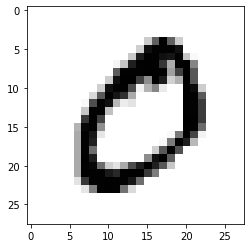

In [ ]:
#Visualizing the image in binary form
plt.imshow(X_train[1], cmap = plt.cm.binary)
plt.show()

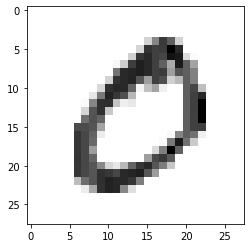

In [ ]:
#Normalizing the image for faster convergence
X_train  = tf.keras.utils.normalize(X_train, axis = 1)
X_test  = tf.keras.utils.normalize(X_test, axis = 1)
plt.imshow(X_train[1], cmap = plt.cm.binary)

In [ ]:
#checking if all values are normalized i.e 0 to 1
print(X_train[1])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
#resizing the images
img_size = 28
X_trainr = np.array(X_train).reshape(-1,img_size, img_size,1)
X_testr = np.array(X_test).reshape(-1,img_size, img_size,1)
print('Training dimension: ', X_trainr.shape)
print('Testing dimension: ', X_testr.shape)

Training dimension:  (60000, 28, 28, 1)
Testing dimension:  (10000, 28, 28, 1)


In [ ]:
# #Encoding the labels
# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

In [ ]:
#creating a neural network
model = Sequential()

#Convolution layer 1
model.add(Conv2D(64,(3,3), input_shape = X_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

#Convolution layer 2
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

#Convolution layer 3
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

#Fully Connected layer 1
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

#Fully Connected layer 2
model.add(Dense(32))
model.add(Activation("relu"))

#Last Fully Connected layer
model.add(Dense(10))
model.add(Activation("softmax"))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [ ]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [ ]:
# # Create a callback to save the model's weights
# checkpoint_path = "/content/drive/MyDrive/Datasets/MNSIT/checkpoint/model.h5"

# # cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
# #                                                  save_weights_only=True,
# #                                                  verbose=1)
# model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
#     filepath=checkpoint_path,
#     save_weights_only=True,
#     monitor='val_accuracy',
#     mode='max',
#     save_best_only=True)

In [ ]:
# Train the model with the new callback
model.fit(X_trainr, 
          y_train,  
          epochs=10,
          validation_split=0.3)  # Pass callback to training


Epoch 1/10
1313/1313 [==============================] - 18s 6ms/step - loss: 0.3054 - accuracy: 0.9032 - val_loss: 0.1170 - val_accuracy: 0.9636
Epoch 2/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.1003 - accuracy: 0.9689 - val_loss: 0.0981 - val_accuracy: 0.9703
Epoch 3/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0716 - accuracy: 0.9774 - val_loss: 0.0807 - val_accuracy: 0.9749
Epoch 4/10
1313/1313 [==============================] - 7s 6ms/step - loss: 0.0554 - accuracy: 0.9830 - val_loss: 0.0710 - val_accuracy: 0.9789
Epoch 5/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0440 - accuracy: 0.9857 - val_loss: 0.0703 - val_accuracy: 0.9784
Epoch 6/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0357 - accuracy: 0.9890 - val_loss: 0.0545 - val_accuracy: 0.9841
Epoch 7/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0300 - accuracy: 0.9901 - val_loss: 0.0652 - val_accuracy

In [ ]:
model.save('final_model.h5')

In [ ]:
#Evaluating the model
test_loss, test_acc = model.evaluate(X_testr, y_test)
print('Test Loss: ', test_loss)
print('Test Accuracy: ', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0791 - accuracy: 0.9802
Test Loss:  0.07909204065799713
Test Accuracy:  0.9801999926567078


In [ ]:
#Predictions on the model
predictions = model.predict([X_testr])

313/313 [==============================] - 1s 2ms/step


In [ ]:
#Prediciton on 0th image
print(np.argmax(predictions[0]))

7


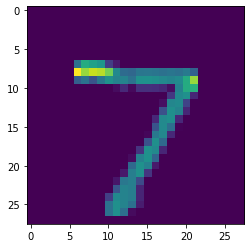

In [ ]:
#Actual 0th image
plt.imshow(X_test[0])